# Bicycle model
---

*Narcís Palomeras - September 2022 - Universitat de Girona (all rights reserved)*

**This project belongs to the Universitat de Girona. It is forbidden to publish this project or any derivative work in any public repository.**

---

Fill in the names of the group members:

#### Nguyen Huu Truong Giang u6110634
#### Praveen Kumar Murali u6110748

---

This lab is about kinematic motion models and basic motion controllers. It is divided in three parts:

* The Bicycle model
* Moving to a point ($x$, $y$)
* Move to a pose ($x$, $y$, $\theta$)

## Bicycle model

The bicycle model is a simplification of the popular *Ackerman* model used by cars. It is described by the following figure ([source](https://link.springer.com/book/10.1007/978-3-642-20144-8)):

<img src="http://eia.udg.edu/~npalomer/imgs/as/bicycle_model.png" width=450/>

The state of a *bicycle* is represented by:

$$
q = [x~y~\theta]
$$

where:

* $x$: is the $x$ position of the bicycle wrt. the world frame.
* $y$: is the $y$ position of the bicycle wrt. the world frame.
* $\theta$: is the orientation of the bicycle wrt. the world frame.

Because we are modelling a kinematic model, you do not have to include velocities in the state. However, let's define them:

* $v$: is the linear of the bicycle wrt. the bicycle frame.
* $w$: is the angular velocity of the bicycle, being $w = \dot{\theta}$.

The linear velocity measured in the vehicle frame is:

$$
^V{}\dot{x} = \nu, ~ ^V{}\dot{y} = 0 
$$

The bicycle model has 2 control inputs: 

* Desired velocity ($\nu_d$)
* Desired steering angle ($\gamma_d$)

## Pre-lab 


> **Exercise**: To measure the turnning speed we need to compute first the *turning radius*. Looking at the figure above, measure the *turning radius* ($R_{1}$) using only the steering angle ($\gamma$) and the wheel base ($L$). Once you know the turning radius ($R_1$) you can compute the angular velocity $\dot{\theta}$ using the turning radius $R_1$ and the forward velocity $\nu$.


With the bicycle model above, we can see that the instantaneous center of rotation (ICR) lies on the extension of the rear axle and the front wheel's heading line. Therefore, we can calculate the turning radius ($R_{1}$) using only the steering angle ($\gamma$) and the wheel base ($L$):

$$R_{1} = \frac{L}{tan\gamma}$$

> **Exercise**: Compute $\dot{\theta}$

*Notice that when $\nu=0$ then $\dot{\theta} = 0$, then it is not possible to change the vehicle’s orientation when it is not moving.*


$$\omega = \dot{\theta} = \frac{v}{R_{1}} = \frac{v.tan\gamma}{L}

> **Exercise**: Compute $x_{t+1}$, $y_{t+1}$ and $\theta_{t+1}$ using only $\nu$, $\dot{\theta}$ and the previous state $[x_t, y_t, \theta_t]$.


We want to calculate ($x_{t+1}$, $y_{t+1}$ , $\theta_{t+1}$) from ($x_{t}$, $y_{t}$ , $\theta_{t}$)
<!-- For $\omega = 0$ -->
$$ 
\begin{bmatrix} x_{t+1} \\ y_{t+1} \\ \theta_{t+1} \end{bmatrix} = \begin{bmatrix} \cos(\theta) & 0 \\ \sin(\theta) & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} v \\ \omega \end{bmatrix} + \begin{bmatrix} x_{t} \\ y_{t} \\ \theta_{t} \end{bmatrix}
$$
<!-- For $\omega \neq 0$
$$ 
\begin{bmatrix} x_{t+1} \\ y_{t+1} \\ \theta_{t+1} \end{bmatrix} = \begin{bmatrix} \frac{1}{\omega}(\sin(\theta + \omega) - \sin(\theta)) & 0 \\ -\frac{1}{\omega}(\cos(\theta + \omega) - \cos(\theta)) & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} v \\ \omega \end{bmatrix} + \begin{bmatrix} x_{t} \\ y_{t} \\ \theta_{t} \end{bmatrix}
$$ -->

> **Exercise**: Although we are implement a kinematics model, we will set a maximum/minimum acceleration. Therefore, if we know the maximum/minimum accelerations as well as the previous velocities (ie., $\nu_{t-1}$ and $w_{t-1}$) how can we limit the change in velocity respecting the maximum/minimum accelerations? Propose an equation.

Linear velocity
$$ a_{min}\triangle{t} \le v_{t} - v_{t - 1} \le a_{max}\triangle{t} $$
Angular velocity
$$ \frac{a_{min}}{R_{1}}\triangle{t} \le \omega_{t} - \omega_{t - 1} \le \frac{a_{max}}{R_{1}}\triangle{t} $$

## LAB

### Auxiliar functions:

Two functions are given to you to simplify the implementation:

* `wrap_angle`: Wraps angle between -$\pi$ and $\pi$.
* `plot_results`: Plot control commands and the bicycle model state

Check the code because you will need to use it in the following sections.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def wrap_angle(angle):
    """ Wraps angle between -pi and pi 

    @type  angle: float or numpy array
    @param angle: angle in radians

    @rtype:   float or numpy array
    @return:  angle in radians between -Pi to Pi
    """
    if isinstance(angle, float) or isinstance(angle, int):
        return (angle + ( 2.0 * np.pi * np.floor( ( np.pi - angle ) / ( 2.0 * np.pi ) ) ) )
    elif isinstance(angle, np.ndarray):
        return (angle + np.pi) % (2 * np.pi ) - np.pi 
    elif isinstance(angle, list):
        ret = []
        for i in angle:
            ret.append(wrap_angle(i))
        return ret
    else:
        raise NameError('wrap_angle')

In [2]:
def plot_results(controls, states):
    """ Plot control commands and the bicycle model state
    @type  controls: list()
    @param controls: list of 2D lists containing [desired velocity, steering angle] 
    
    @type  states: list()
    @param states: list of 5D lists containing desired vehicle state [x, y, theta, v, w] 
    """

    i = np.array(controls).T
    plt.plot(i[0], label="v (m/s)")
    plt.plot(i[1], label="gamma (rad)")
    plt.title("Control commands")
    plt.legend()
    plt.show()

    p = np.array(states).T
    plt.plot(p[0], p[1], label="trajectory (m)")
    plt.plot(p[0][-1], p[1][-1], "*", label="goal")
    plt.axis('equal')
    plt.title("Trajectory")
    plt.legend()
    plt.figure(figsize=(6,6))
    plt.show()

    plt.plot(p[3], label="v (m/s)")
    plt.plot(p[4], label="w (rad/s)")
    plt.title("Velocity")
    plt.legend()
    plt.show()

### Exercise1: Implement the bicycle model kinematics

The kinematics model is able to compute the bicycle next state $q=[x~y~\theta~\nu~w]$ given the current state, the desired velocity ($\nu_d$) and the steering angle ($\gamma$) considering the maximum velocity and acceleration that the vehicle is able to reach.

```python
def bicycle_kinematics_model([x_t, y_t, theta_t, v_t, w_t], v_d, gamma_d):
    ...
    return [x, y, theta, v, w]
```


* `[x, y, theta, v, w]` is the vehicle state at time *t+1*,
* `[x_t, y_t, theta_t, v_t, w_t]` is the vehicle state at time *t* 
* `v_d` is the desired forward velocity, 
* `gamma_d` is the desired steering angle, 

The following parameters will be used

* `inc_t = 0.1` is the time increment per step,
* `L = 0.98` is the distance between the bicycle wheels,
* `max_steering = 40º` the maximum steering angle allowed (mechanically).
* `max_v = [6 m/s, 3.1416 rad/s]` the maximum velocity that the model can achieve both linear and angular.
* `min_v = [0 m/s, -3.1416 rad/s]` the minimum velocity that the model can achieve both linear and angular.
* `max_a = [2 m/s2, 1.57 rad/s2]` the maximum acceleration that the model can achieve both linear and angular.
* `min_a = [-4 m/s2, -3.1416 rad/s2]` the minimum acceleration that the model can achieve both linear and angular.

Complete the following class.

In [3]:
class BicycleModel:
    def __init__(
        self,
        initial_state=np.zeros(5),
        wheel_base=0.98,
        max_steering=0.7,
        max_vel=6.0,
        inc_t=0.1,
    ):
        """Creates a bicycle model class
        @type  initial_state: ndarray
        @param initial_state: ndarray containing initial [x y theta v w]

        @type  wheel_base: float
        @param wheel_base: distance (m) between the 2 axis of the two wheels

        @type  max_vel: float
        @param max_vel: maximum velocity (m/s) that the model can reach

        @type  max_steering: float
        @param max_steering: maximum steering angle (rad) that the bicycle model can reach
        """
        self.q = initial_state  # [x, y, theta, v, w]
        self.L = wheel_base
        self.max_steering = max_steering
        self.max_vel = [max_vel, np.pi]
        self.min_vel = [0, -np.pi]
        self.max_acc = [2, np.pi / 2]
        self.min_acc = [-4, -np.pi]
        self.inc_t = inc_t

    def kinematics(self, desired_v, desired_streering_angle):
        """Computes the kinematics for a bicycle model
        @type  desired_v: float
        @param desired_v: desired velocity command control

        @type  desired_streering_angle: float
        @param desired_streering_angle: desired steering_angle command control

        @rtype: ndarray
        @return: ndarray containing resulting vehicle state [x y theta v w]
        """

        if desired_streering_angle > self.max_steering:
            desired_streering_angle = self.max_steering
        elif desired_streering_angle < -self.max_steering:
            desired_streering_angle = -self.max_steering

        linear_acceleration = (desired_v - self.q[3]) / self.inc_t

        if linear_acceleration > self.max_acc[0]:
            linear_acceleration = self.max_acc[0]
        elif linear_acceleration < self.min_acc[0]:
            linear_acceleration = self.min_acc[0]

        linear_velocity = self.q[3] + linear_acceleration * self.inc_t

        if linear_velocity > self.max_vel[0]:
            linear_velocity = self.max_vel[0]
        elif linear_velocity < self.min_vel[0]:
            linear_velocity = self.min_vel[0]

        if desired_streering_angle > self.max_steering:
            desired_streering_angle = self.max_steering
        elif desired_streering_angle < -self.max_steering:
            desired_streering_angle = -self.max_steering

        angular_velocity_desired = (
            linear_velocity * np.tan(desired_streering_angle) / self.L
        )
        angular_acceleration = (angular_velocity_desired - self.q[4]) / self.inc_t

        if angular_acceleration > self.max_acc[1]:
            angular_acceleration = self.max_acc[1]
        elif angular_acceleration < self.min_acc[1]:
            angular_acceleration = self.min_acc[1]

        angular_velocity = self.q[4] + angular_acceleration * self.inc_t

        if angular_velocity > self.max_vel[1]:
            angular_velocity = self.max_vel[1]
        elif angular_velocity < self.min_vel[1]:
            angular_velocity = self.min_vel[1]

        v = linear_velocity
        w = angular_velocity

        x = self.q[0] + v * np.cos(self.q[2]) * self.inc_t
        y = self.q[1] + v * np.sin(self.q[2]) * self.inc_t

        theta = self.q[2] + w * self.inc_t

        # Return new state vector
        self.q = np.array([x, y, theta, v, w])

Test the `BicycleModel` class you have just implemented by executing the following code.

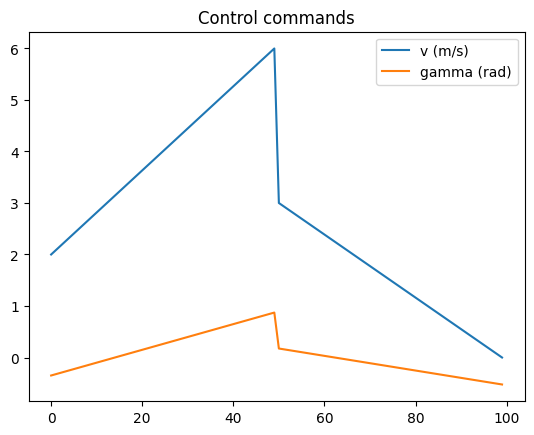

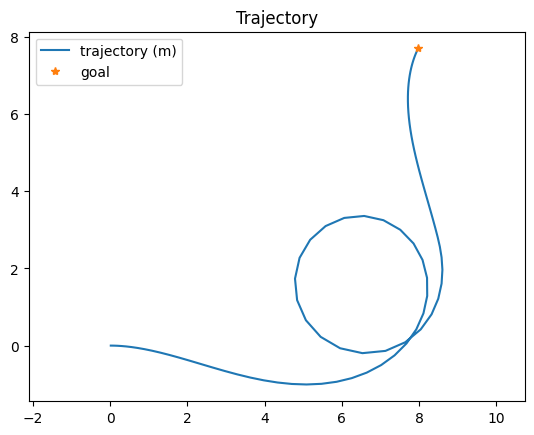

<Figure size 600x600 with 0 Axes>

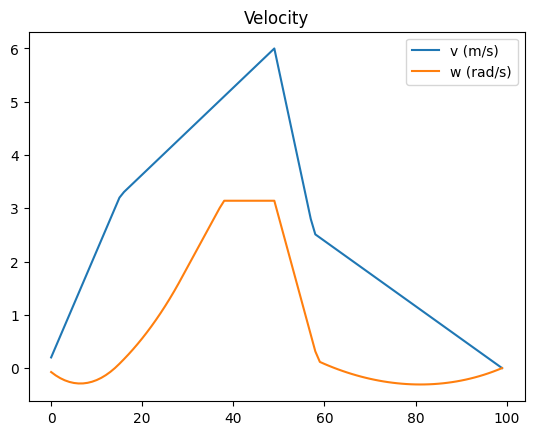

In [4]:
# Create command actions
velocity = np.hstack((np.linspace(2, 6, 50), np.linspace(3, 0, 50)))
steering = np.hstack((np.linspace(-20, 50, 50), np.linspace(10, -30, 50)))
steering = np.radians(steering)

# Create bicycle model
bike = BicycleModel()

# Execute commands using bicycle model and store the result
controls = []
states = []

for v, s in zip(velocity, steering):
    controls.append([v, s])
    bike.kinematics(v, s)
    states.append(bike.q)

plot_results(controls, states)

### Exercise 2: Move to a point controller

Now that the kinematics model for a bicycle-like vehicle is implemented, let's try to control it to move to a point ($x$, $y$).


This is a basic controller to reach a point:

$$
\nu_d = K_v \sqrt{(x_g - x)^2 + (y_g - y)}
$$

$$
\theta_d = \tan^{-1}\frac{y_g - y}{x_g - x} 
$$

$$
\gamma_d = K_h \text{wrap\_angle}(\theta_d - \theta)
$$

Where $K_v > 0$ and $K_h > 0$ and $\text{goal} = [x_g~y_g]$ 

The *move to point* controller should follow an interface similar to:

```python
def move_to_point(state, goal, Kv, Kh):
    ...
    return v_d, gamma_d
```

where:
* `state` is the current state of the robot (i.e., $[x~y~\theta~v~w]$), 
* `goal` is the $[x_g~y_g]$ position that the robot must reach
* `Kv` is a proportional gain for the forward velocity
* `Kh` is a proportional gain for the angular velocity
* `[v_d, gamma_d]` are the command actions that the controller requests to the robot to reach the `goal`.

Complete the following function:

In [5]:
def move_to_point(bike, goal, Kv=0.5, Kh=0.2):
    """Computes the control command to move from current position to goal.
    @type  bike: BicycleModel
    @param bike: model containing current state (q) as well as maximum velocity and steering parameters

    @type  goal: ndarray or list
    @param goal: ndarray/list containing x, y position

    @type  Kv: float
    @param Kv: Proportional gain for velocity contral command

    @type  Kh: float
    @param Kh: Proportional gain for steering contral command

    @rtype: float, float
    @return: Desired velocity and steering commands to reach goal from current position
    """

    velocity_desired = Kv * np.sqrt(
        np.square(goal[0] - bike.q[0]) + np.square(goal[1] - bike.q[1])
    )
    theta_desried = np.arctan2((goal[1] - bike.q[1]), (goal[0] - bike.q[0]))
    steering_desired = Kh * wrap_angle(theta_desried - bike.q[2])
    v_d = velocity_desired
    gamma = steering_desired

    return v_d, gamma

Test the function `move_to_point` you have implemented by executing the following code.

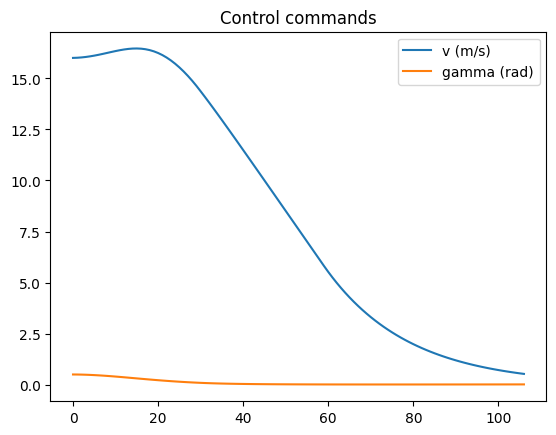

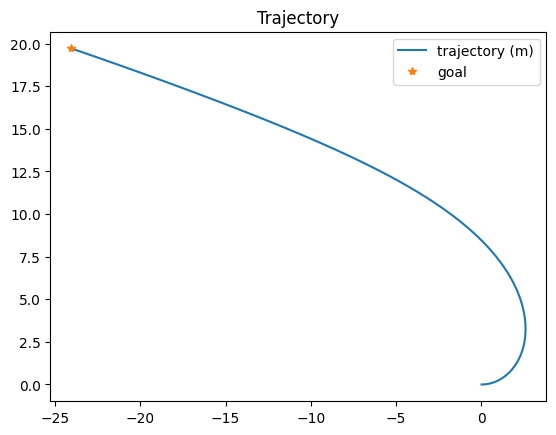

<Figure size 600x600 with 0 Axes>

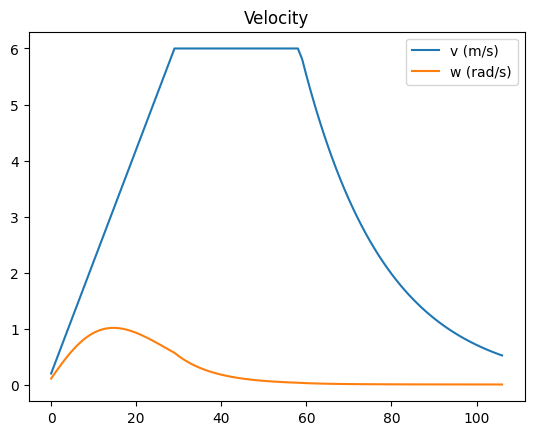

In [6]:
goal = np.array([-25.0, 20.0])
bike = BicycleModel()
max_error = 1.0

inputs = []
states = []

while np.linalg.norm(goal - bike.q[0:2]) > max_error:
    v_d, gamma = move_to_point(bike, goal)
    bike.kinematics(v_d, gamma)
    inputs.append([v_d, gamma])
    states.append(bike.q)

plot_results(inputs, states)

### Exercise 3: Move to a pose controller

For some applications it is important to have a controller that drives a vehicle not only to a point but to a pose (i.e., [$x_g$ $y_g$ $\theta_g$]). This is not always possible, but for the bicycle model there is a controller that allows to do that if the `goal` to reach is in front of the vehicle.

According to the following figure ([source](https://link.springer.com/book/10.1007/978-3-642-20144-8))

<img src="http://eia.udg.edu/~npalomer/imgs/as/bicycle_model2.png" width=450/>

the bicycle model can be represented using polar coordinates as follows:

$$
\rho = \sqrt{\Delta_x ^2 + \Delta_y ^2}
$$
$$
\alpha = \tan^{-1}\frac{\Delta_y}{\Delta_x} - \theta
$$
$$
\beta = \theta_g - \theta - \alpha
$$

being:

* `goal`: $[x_g~y_g~\theta_g$],
* vehicle `state`: $[x~y~\theta]$,
* $\Delta_x$ = $x_g - x$
* $\Delta_y$ = $y_g - y$
* $\rho$ the distance from the vehicle to the `goal`,
* $\beta$ the angle of the goal vector with respect to the world frame, and
* $\alpha$ the angle of the goal vector with respect to the vehicle frame. 

The following linear control law is able to drive the robot to a unique equilibrium point (see the demonstration [here](https://link.springer.com/book/10.1007/978-3-642-20144-8)):

$$
\nu_d = k_\rho \rho
$$

$$
\gamma_d = k_\alpha \alpha + k_\beta \beta
$$

if the following conditions hold:

$
-\pi/2 < \alpha < \pi/2 
$

and 

$
k_\rho > 0,~ k_\beta < 0,~ k_\alpha - k_\rho > 0
$

Complete the following function to implement the proposed pose controller:

In [7]:
def move_to_pose(bike, goal, Kp=0.5, Ka=1.0, Kb=-0.5): 
    """ Computes the control command to move from current position to goal pose. 
    @type  bike: BicycleModel
    @param bike: model containing current state (q) as well as maximum velocity and steering parameters  

    @type  goal: ndarray or list
    @param goal: ndarray/list containing x, y, theta pose  

    @type  Kp: float
    @param Kp: Proportional gain for velocity contral command, Kp > 0

    @type  Ka: float
    @param Ka: Proportional gain for steering contral command, Ka - Kp > 0

    @type  Kb: float
    @param Kb: Proportional gain for steering contral command, Kb < 0

    @rtype: float, float
    @return: Desired velocity and steering commands to reach the goal
    """
    assert Kp > 0 # Condition Kp > 0
    assert Kb < 0 # Condition Kb < 0
    assert Ka - Kb > 0 # Condition Ka - Kb > 0

    delta_x = goal[0] - bike.q[0]
    delta_y = goal[1] - bike.q[1]
    p = np.sqrt(delta_x ** 2 + delta_y ** 2)
    alpha = np.arctan2(delta_y, delta_x) - bike.q[2]
    
    assert alpha > -np.pi/2 and alpha < np.pi/2 # Condition -pi/2 < alpha < pi/2
    
    beta = goal[2] - bike.q[2] - alpha

    v_d = Kp * p
    gamma = Ka * alpha + Kb * beta

    return v_d, gamma


Goal pose reached at (25.11, 20.22), -91.0º


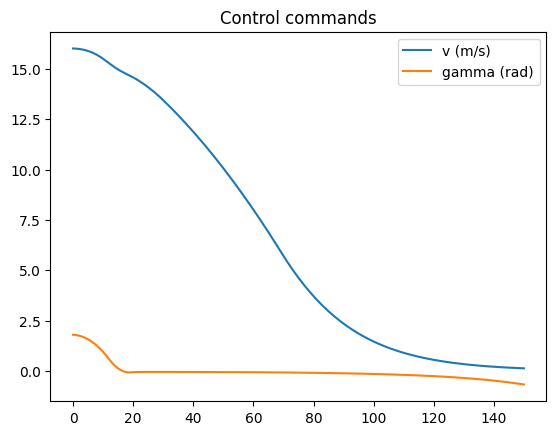

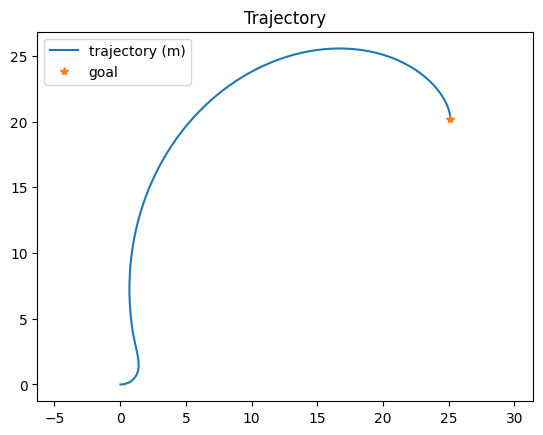

<Figure size 600x600 with 0 Axes>

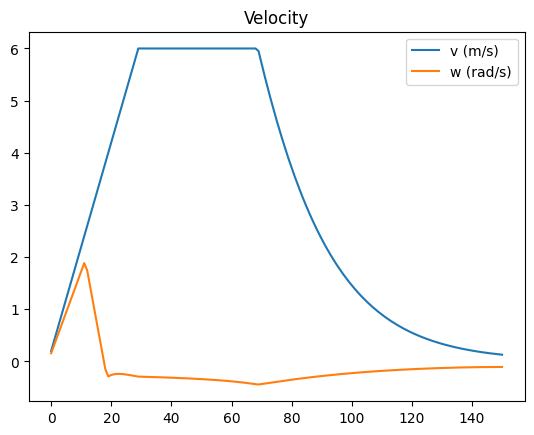

In [8]:
goal = np.array([25.0, 20.0, -np.pi/2])
bike = BicycleModel()
max_error = 0.25

inputs = []
states = []
v_d = 0

while np.linalg.norm(goal[0:2] - bike.q[0:2]) > max_error and v_d >= 0:
    v_d, gamma = move_to_pose(bike, goal)
    bike.kinematics(v_d, gamma)
    inputs.append([v_d, gamma])
    states.append(bike.q)

print("Goal pose reached at ({}, {}), {}º".format(np.round(bike.q[0],2), np.round(bike.q[1],2), np.round(np.degrees(bike.q[2])),2))
plot_results(inputs, states)

## Deliverable

Upload this Python Interactive Notebook fully completed through the Moodel platform before the deadline.
You can submit this lab up to 7 days late. However, you will be deducted 1 point if you submit it from 1 minute to 23h 59 minutes late, 2 points if you submit it from 24h to 47h 59 minutes late, etc.

Make sure that all cells can be executed.